# AIX360
---
Expliration of the library

In [2]:
!pip install aix360

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import joblib
import matplotlib as plt

from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score, confusion_matrix

import aix360

In [5]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
path_mv = "drive/MyDrive/01-Education/03-PhD/2021/Courses/HCI/hci_code/"
path_mg = "drive/MyDrive/HCI/hci_code/"
path_nj = ""

# change to your private path
gdrive_project_root = path_mv 

# Load data and replicate the model

In [7]:
X = pd.read_csv(gdrive_project_root + 'data/processed/3_cls_model_input/X_3cls.csv')
y = pd.read_csv(gdrive_project_root + 'data/processed/3_cls_model_input/y_3cls.csv')
X_train = pd.read_csv(gdrive_project_root + 'data/processed/3_cls_model_input/X_train_3cls.csv')
X_test = pd.read_csv(gdrive_project_root + 'data/processed/3_cls_model_input/X_test_3cls.csv')
y_train = pd.read_csv(gdrive_project_root + 'data/processed/3_cls_model_input/y_train_3cls.csv')
y_test = pd.read_csv(gdrive_project_root + 'data/processed/3_cls_model_input/y_test_3cls.csv')

In [8]:
clf = joblib.load(gdrive_project_root+'models/CLF_3classes_GBM-PHC-AASTR_RandomForest_330estimators_42_random_state.pkl')

In [9]:
predictions = clf.predict(X_test)
print("Model accuracy: %s \n" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Model accuracy: 0.7674418604651163 

              precision    recall  f1-score   support

           1       0.77      0.81      0.79        42
           2       0.87      0.91      0.89        22
           3       0.63      0.55      0.59        22

    accuracy                           0.77        86
   macro avg       0.76      0.75      0.75        86
weighted avg       0.76      0.77      0.76        86



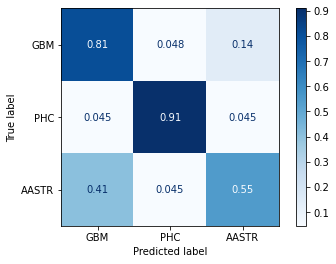

In [10]:
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues, display_labels=["GBM", "PHC", "AASTR"], normalize = "true")

In [15]:
# Binarize data and also return standardized ordinal features
from aix360.algorithms.rbm import FeatureBinarizer
fb = FeatureBinarizer(negations=True, returnOrd=True)
dfTrain, dfTrainStd = fb.fit_transform(X_train)
dfTest, dfTestStd = fb.transform(X_test)
dfTrain.head()

feature   Mutation Count              ... Additional_cancer     Age Group    
operation             <=              ...                   not           not
value                3.0 4.0 6.0 8.0  ...                                    
0                      1   1   1   1  ...                 0   1         0   1
1                      0   1   1   1  ...                 0   1         0   1
2                      0   0   0   0  ...                 0   1         0   1
3                      0   0   1   1  ...                 0   1         0   1
4                      0   0   0   0  ...                 0   1         1   0

[5 rows x 68 columns]

In [17]:
# Instantiate BRCG with small complexity penalty and large beam search width
from aix360.algorithms.rbm import BooleanRuleCG
br = BooleanRuleCG(lambda0=1e-3, lambda1=1e-3, CNF=True)

# Train, print, and evaluate model
br.fit(dfTrain, y_train)
from sklearn.metrics import accuracy_score
print('Training accuracy:', accuracy_score(yTrain, br.predict(dfTrain)))
print('Test accuracy:', accuracy_score(yTest, br.predict(dfTest)))
print('Predict Y=0 if ANY of the following rules are satisfied, otherwise Y=1:')
print(br.explain()['rules'])



# # Instantiate LRR with good complexity penalties and numerical features
# from aix360.algorithms.rbm import LogisticRuleRegression
# lrr = LogisticRuleRegression(lambda0=0.005, lambda1=0.001, useOrd=True)

# # Train, print, and evaluate model
# lrr.fit(dfTrain, yTrain, dfTrainStd)
# print('Training accuracy:', accuracy_score(yTrain, lrr.predict(dfTrain, dfTrainStd)))
# print('Test accuracy:', accuracy_score(yTest, lrr.predict(dfTest, dfTestStd)))
# print('Probability of Y=1 is predicted as logistic(z) = 1 / (1 + exp(-z))')
# print('where z is a linear combination of the following rules/numerical features:')
# lrr.explain()

Learning CNF rule with complexity parameters lambda0=0.001, lambda1=0.001


ValueError: ignored